# Matemática para Ciencia de los Datos
# Trabajo Práctico 2

Profesor: Luis Alexánder Calvo Valverde

Instituto Tecnológico de Costa Rica,

Programa Ciencia de Datos

---

Fecha de entrega: Martes 13 de Setiembre del 2022, a más tardar a las 3:00 pm.

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo jupyter ( .IPYNB ).

Estudiante(s):
1. Gabriel Valentine Fonseca



---

**Pregunta 1**

Considerando que la transpuesta de una matriz es el resultado de cambiar las filas a columnas. Sea una matriz $A\in\mathbb{R}^{m\times n}$, su transpuesta se escribe como $A^{T}\in\mathbb{R}^{n\times m}$ y sus entradas están dadas por:

\begin{equation}
\left(A^{T}\right)_{i,j}=A_{j,i}.
\end{equation}

Proponga Usted dos matrices, $A\in\mathbb{R}^{4\times 3}$ y $B\in\mathbb{R}^{3\times 4}$ (no las busque en Internet, trate de proponer los valores por si mismo), y utilizando numpy muestre que las siguientes propiedades se cumplen con sus matrices propuestas.

**Note** que ni A ni B son cuadradas, y no tienen las mismas dimensiones.


**1.1 (15 puntos)**

- $\left(A^{T}\right)^{T}=A$


In [ ]:
import numpy as np

A = np.matrix([ [1. , 2. , 3. ], [4. , 5. , 6. ] , [7. , 8. , 9.], [4. , 1. , -5] ])
B = np.matrix([ [52. , 12. , 6. , -4. ], [14. , -5. , 1. , 8] , [32. , 7. , 5. , -21] ])
print( A )
AT = np.transpose(A)
print( AT )
ATT = np.transpose(AT)
print (ATT)

np.array_equal(AT, A)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [ 4.  1. -5.]]
[[ 1.  4.  7.  4.]
 [ 2.  5.  8.  1.]
 [ 3.  6.  9. -5.]]
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [ 4.  1. -5.]]


False

**1.2 (15 puntos)**

- $\left(AB\right)^{T}=B^{T}A^{T}$


In [ ]:
np.array_equal(np.matmul(A,B).T, np.matmul(B.T, A.T))

True

**1.3 (15 puntos)**

Para este ejercicio, **proponga dos matrices de igual dimensionalidad**


- $\left(A+B\right)^{T}=A^{T}+B^{T}$.


In [ ]:
A = np.matrix([ [1. , 2. , 3. ], [4. , 5. , 6. ] , [7. , 8. , 9. ] ])
B = np.matrix([ [52. , 12. , 6. ], [14. , -5. , 1. ] , [32. , 7. , 5. ] ])

np.array_equal((A + B).T, (A.T + B.T))

True

---

**Pregunta 2**


Un conjunto de vectores $\left\{ \vec{x}_{1},\vec{x}_{2},\ldots,\vec{x}_{n}\right\} \in\mathbb{R}^{m}$ se dice que es linealmente independiente, si ningún vector de tal conjunto puede ser representado como una combinación lineal del resto de vectores. De lo contrario, si uno de los vectores en tal conjunto puede ser representado como una combinación lineal del resto de vectores, entonces los vectores son linealmente dependientes, lo que se expresa como:

\begin{equation}
\vec{x}_{j}=\sum_{i=1}^{n-1}\alpha_{i}\vec{x}_{i}
\end{equation}

para cualquier conjunto de valores escalares $\alpha_{1},\ldots,\alpha_{n-1}\in\mathbb{R}$ se dice que el vector $\vec{x}_{j}\in\mathbb{R}^{m}$ es linealmente dependiente de los vectores $\vec{x}_{i}$.


**2.1 (15 puntos)**

Proponga una matriz $A\in\mathbb{R}^{4\times 3}$, cuyos vectores columnas sean linealmente independientes, calcule su rango para mostrar que es de rango $3$ (puede utilizar matrix_rank).


In [ ]:
from numpy.linalg import matrix_rank
A = np.matrix([ [1. , 2. , 3. ], [2. , 5. , 1. ] , [3. , 1. , 6. ] ])

matrix_rank (A)

3

**2.2 (15 puntos)**

Ahora haga los cambios necesarios a su matriz de manera que pase a rango $2$.

In [ ]:

A = np.matrix([ [1. , 2. , 3. ], [2. , 5. , 1. ] , [0 , 0 , 0] ])

matrix_rank (A)

2

---

**Pregunta 3 (25 puntos)**

Utilizando el archivo "Dataset_usar.csv", haga:
- Cargue el archivo.
- Utilizando el modelo $Ax=b$
    - Conforme la matriz $A$ con las primeras 8 columnas.
    - Conforme el vector $b$ con la última columna de la derecha.
    - Calcule el vector de pesos ($x$), del tipo $A^{-1}b=x$
    - Calcule un b_estimado con $A$ e $x$
    - Calcule la norma 2 de la diferencia entre b y b_estimado.
    - Grafique b y b_estimado.



In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
archivo = '/content/drive/MyDrive/Colab Notebooks/Módulo 1/Tareas/Tarea 2/Dataset_usar.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dataFrame = pd.read_csv(archivo, header = 0, delimiter =';')
colNames = dataFrame.columns
print(dataFrame.head())

# Convertir de pandas a numpy
data = pd.DataFrame(dataFrame).to_numpy()

# ver dimensiones
total_columnas = data.shape[1]
total_filas = data.shape[0]
print("Total filas ", total_filas)
print("Total columnas ", total_columnas)



   bias    Length  Diameter    Height     Whole   Shucked  Sex_Female  \
0     1  0.186567  0.155963  0.195652  0.011688  0.333333           0   
1     1  0.813433  0.761468  0.826087  0.433327  0.333333           1   
2     1  0.410448  0.376147  0.369565  0.074022  0.333333           1   
3     1  0.537313  0.504587  0.500000  0.143085  0.333333           1   
4     1  0.507463  0.495413  0.565217  0.146981  0.333333           0   

   Sex_Masculine  Shellweight  
0              1        0.010  
1              0        0.435  
2              0        0.068  
3              0        0.096  
4              1        0.144  
Total filas  998
Total columnas  9


In [ ]:

A = []
b = []

for row in data:
  A.append(row[0:8])
  b.append(row[8])

A = np.array(A)
A.shape


(998, 8)

In [ ]:
from numpy.linalg import pinv
x = np.matmul(pinv(A), b)
x.shape

(8,)

In [ ]:
b_estimado = np.matmul(A,x)
b_estimado.shape

(998,)

In [ ]:
from numpy import linalg as LA
LA.norm(b - b_estimado)

1.2226191827540545

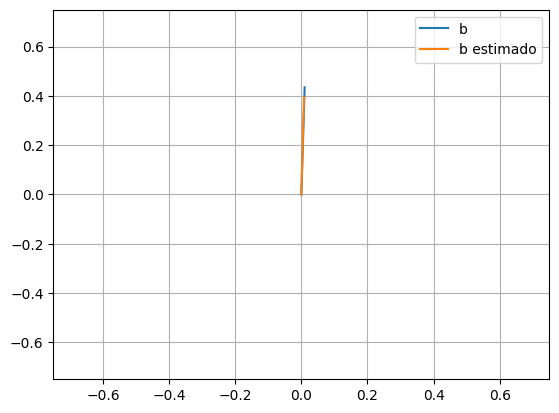

In [ ]:
plt.plot([0, b[0]], [0, b[1]], label="b")
plt.plot([0, b_estimado[0]], [0, b_estimado[1]], label="b estimado")
plt.legend()
plt.xlim(-0.75,0.75)
plt.ylim(-0.75,0.75)
plt.grid()
plt.show()